In [19]:
import mlflow
from mlflow import log_metric, log_param, log_params, log_artifacts
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
params = {"n_estimators": 100, "max_depth": 6, "max_features":3}
# Log a dictionary of parameters
log_params(params)

In [15]:
rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = rf.predict(X_test)

In [22]:
# Log a metric; metrics can be updated throughout the run
log_metric("mean absolute error", mean_absolute_error(y_test,predictions))
log_metric("mean squared error", mean_squared_error(y_test,predictions))
log_metric("R2 - coefficient of determination", r2_score(y_test,predictions))

In [36]:
X_test[:,0].shape, y_test.shape

((111,), (111,))

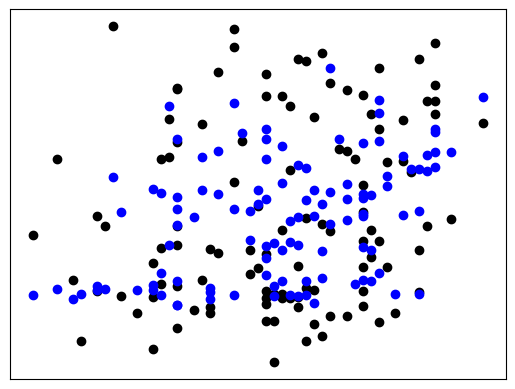

In [40]:
# Plot outputs
import matplotlib.pyplot as plt

plt.scatter(X_test[:,0], y_test, color="black")
plt.scatter(X_test[:,0], predictions, color="blue")

plt.xticks(())
plt.yticks(())

plt.savefig("./outputs/plot_diabetes")

In [41]:
# Log an artifact (output file)
log_artifacts("./outputs")

In [42]:
mlflow.get_tracking_uri()

'file:///home/ivo/Programming_Personal_Projects/mlflow_exploration/quickstart/mlruns'